### Task 3: Exploratory Data Analysis - Retail <br>
This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

**Include Importing Libraries**

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Read data and understand each feature

In [129]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310


In [130]:
df.shape

(9994, 13)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# check-null and delete it if found

In [132]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [133]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [149]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [137]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [138]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [139]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [140]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [141]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [142]:
df["Country"].unique()


array(['United States'], dtype=object)

# check duplicated

In [134]:
df.duplicated().sum()

17

In [135]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [136]:
df.duplicated().sum()

0

# drop unimportant feature

In [143]:
df= df.drop(["Country", "Postal Code"],axis=1)
df.head(4)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310


# visualize data

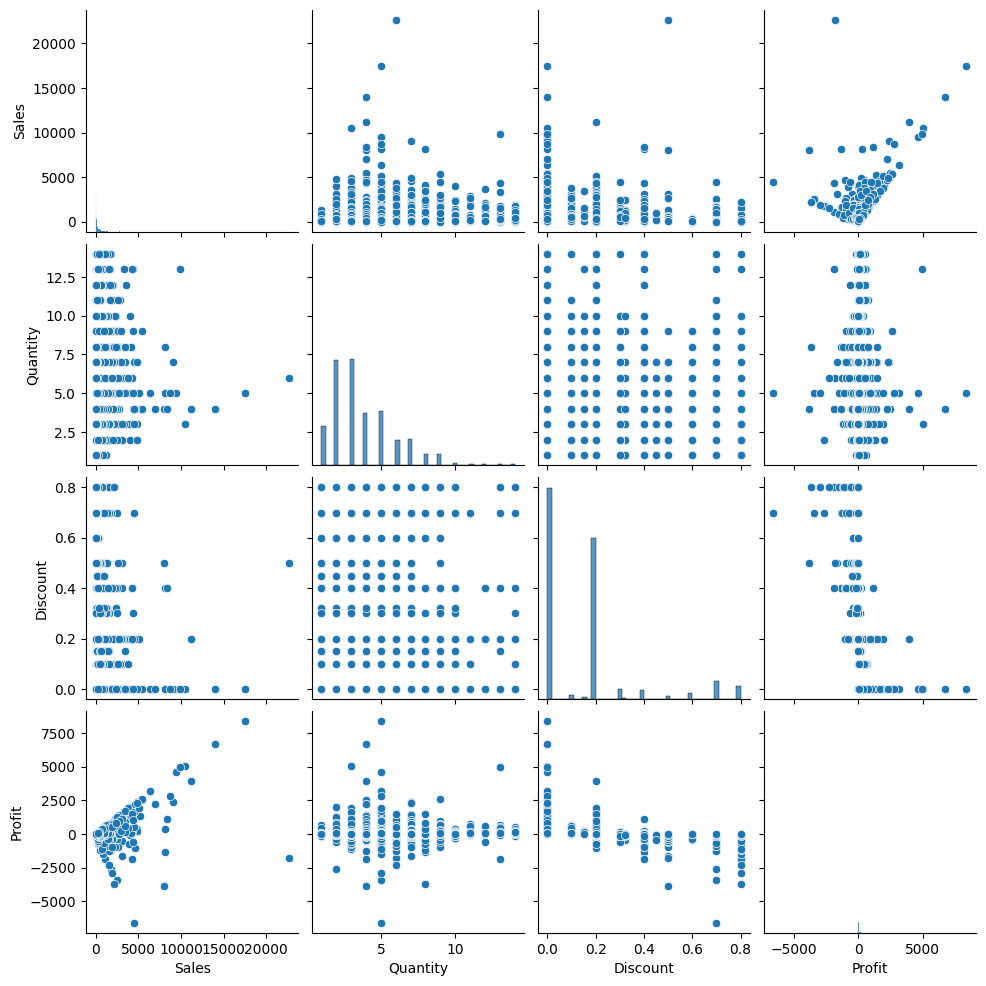

In [144]:
sns.pairplot(df)


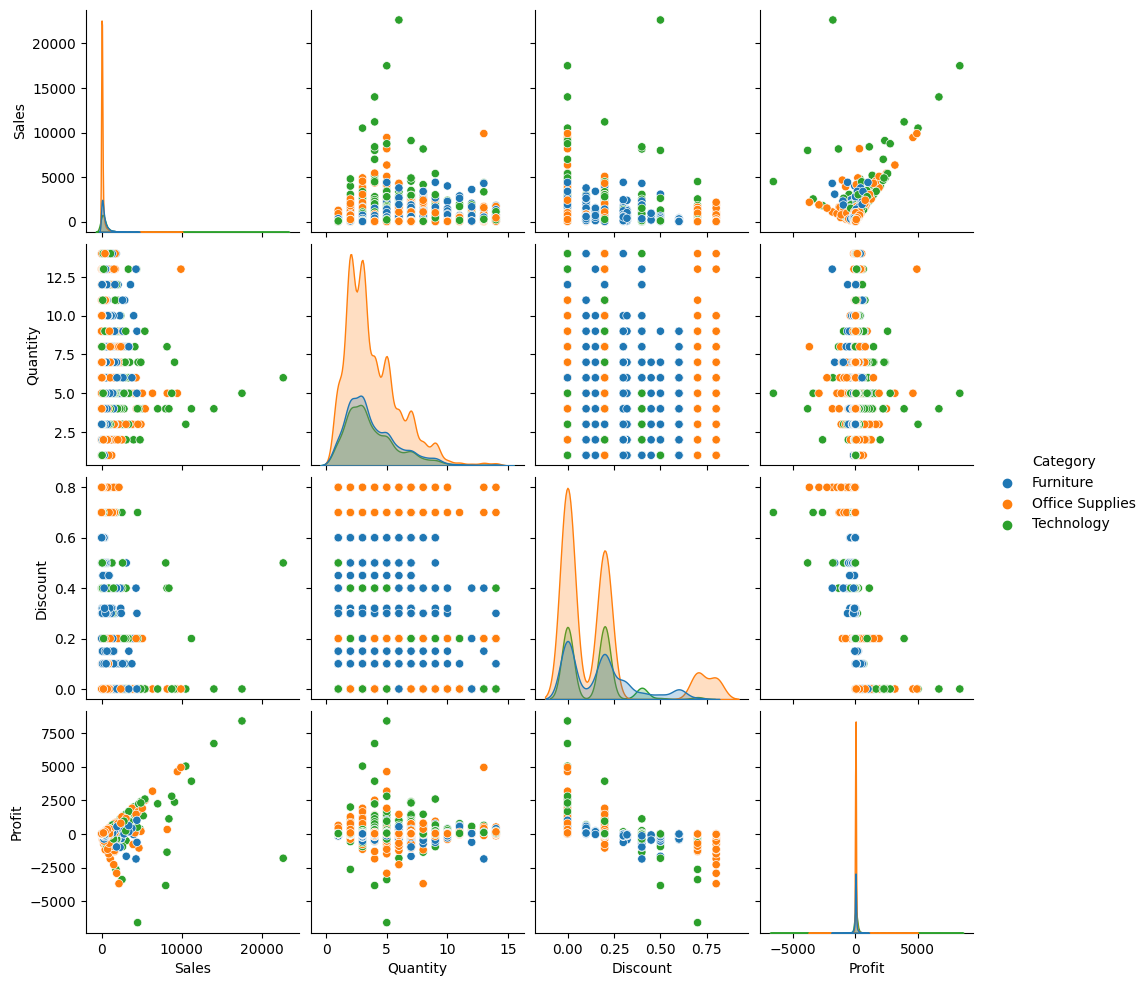

In [145]:
sns.pairplot(df,hue="Category")


# relationship strength between features  ( correlation )

<ipython-input-146-51b00a4f58e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<Axes: >

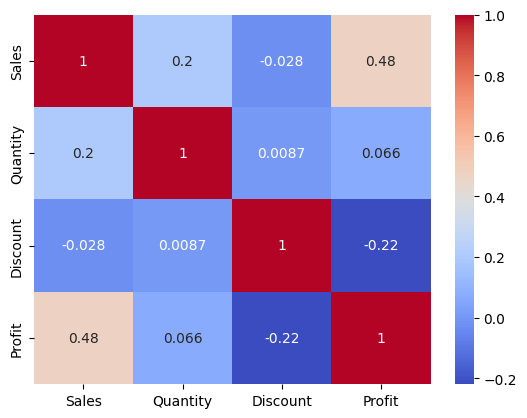

In [146]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Visualize each feature on its own

## Ship Mode

In [147]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

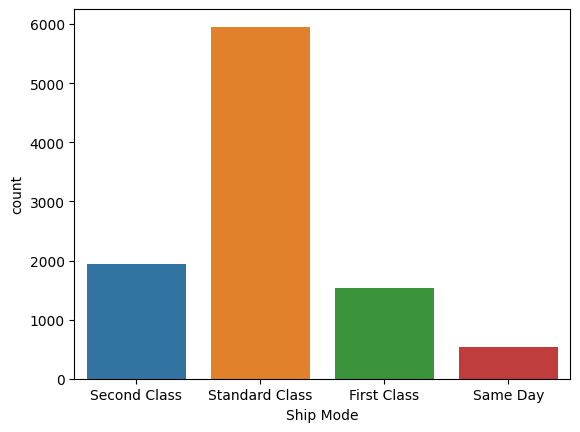

In [148]:
sns.countplot(x=df['Ship Mode'])

## State

In [153]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

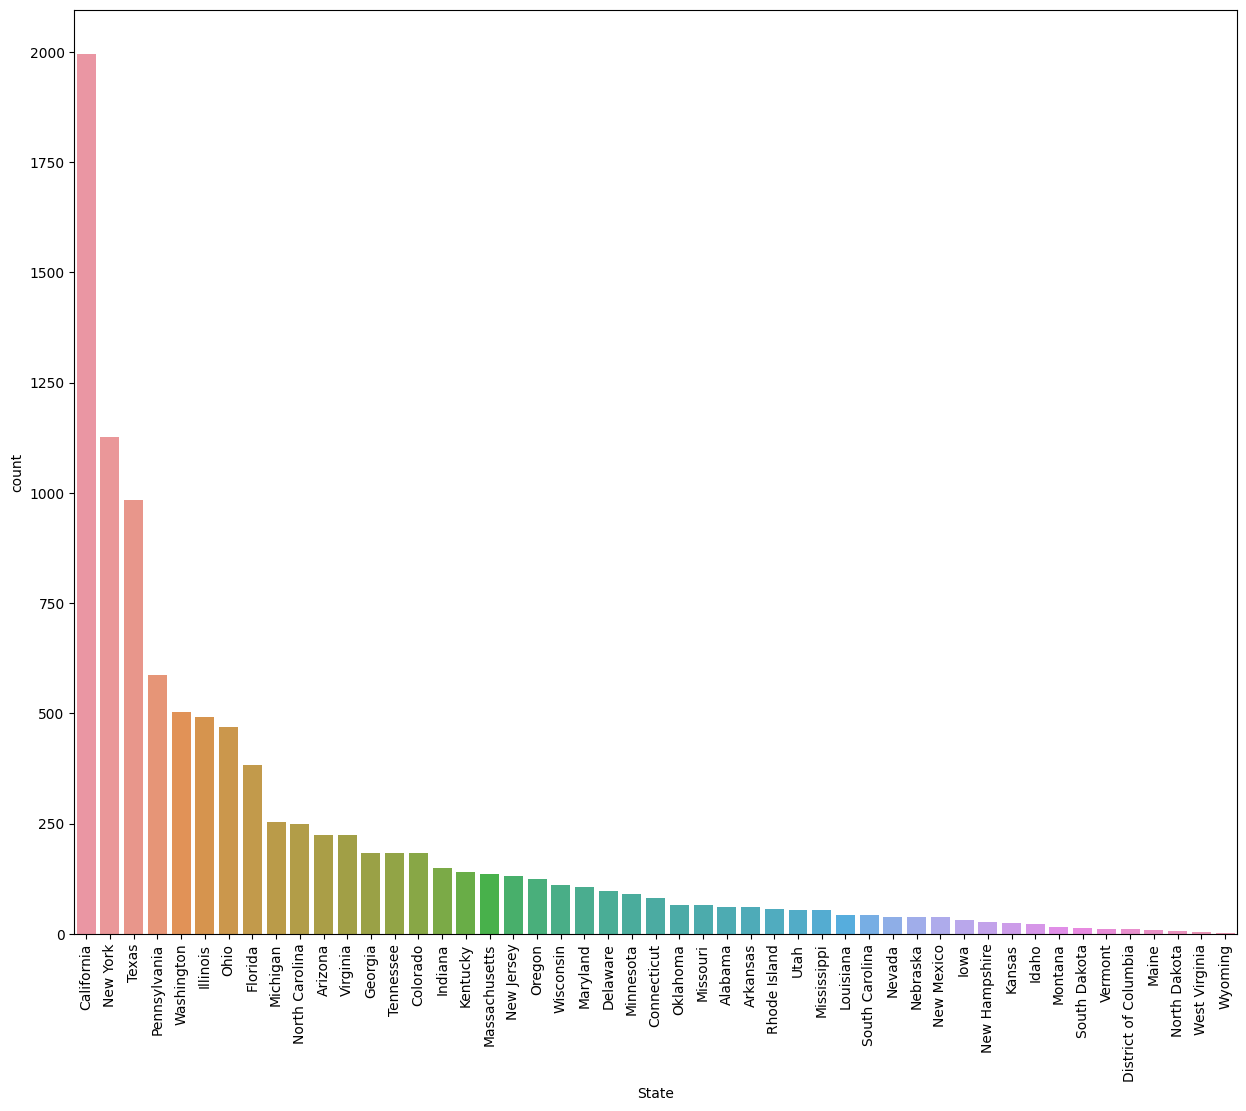

In [154]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

## Sales And Profits By States

[]

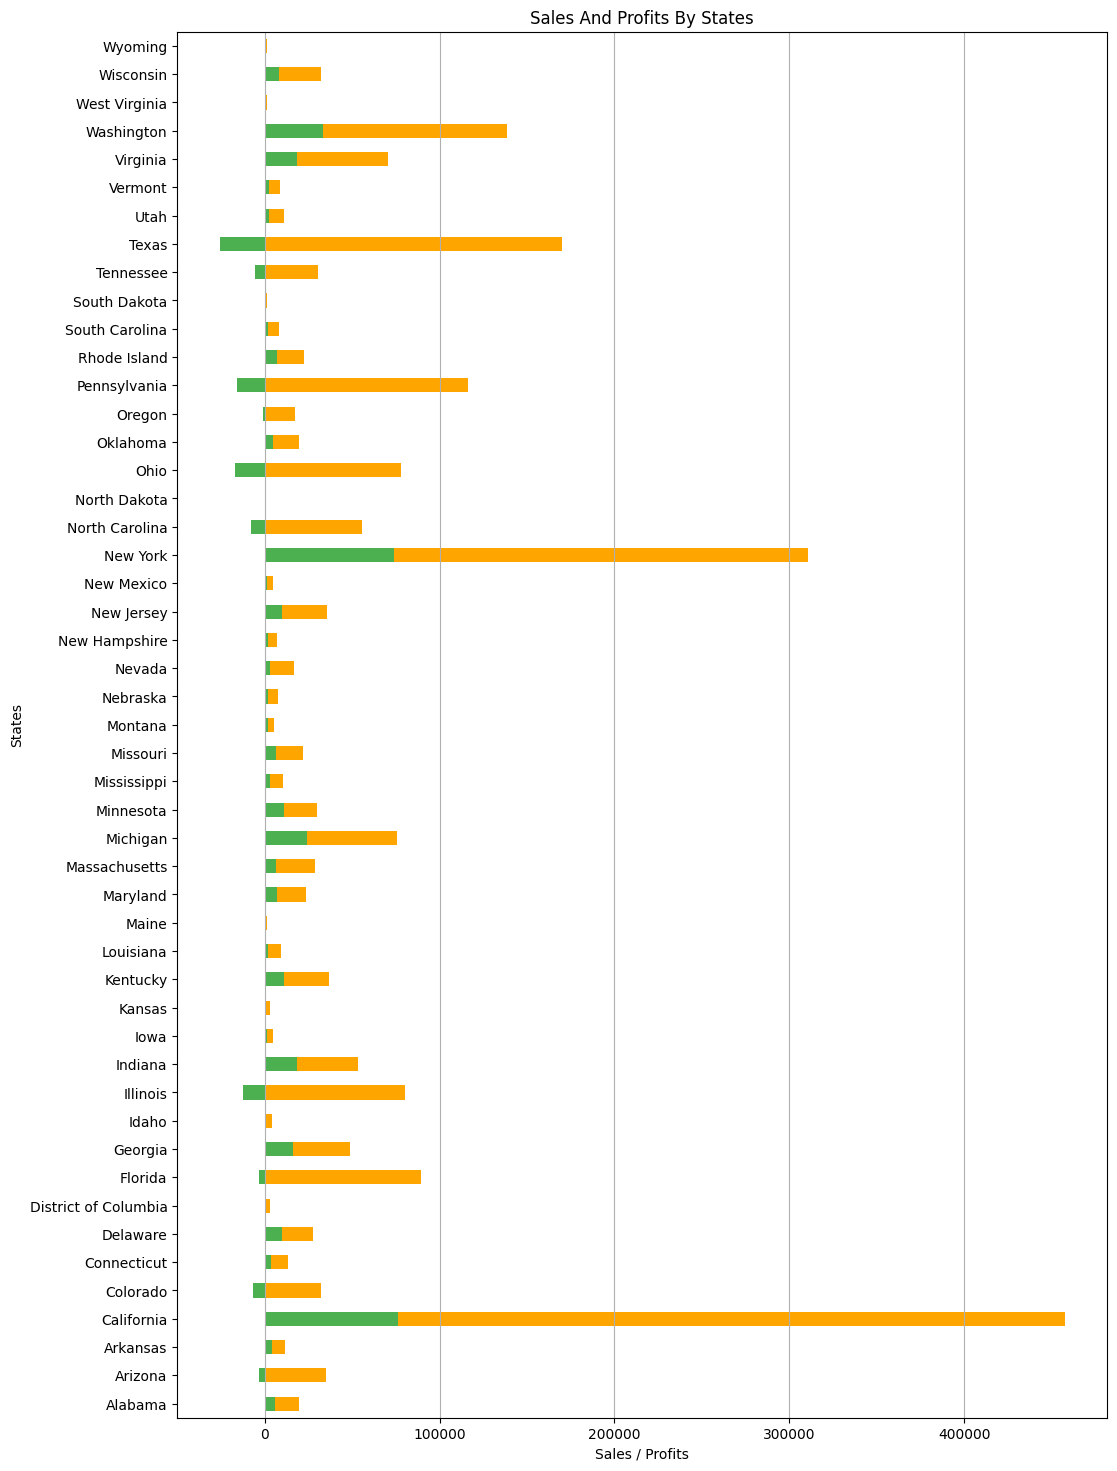

In [150]:
profits = df.groupby("State").Profit.sum()
sales = df.groupby("State").Sales.sum()

fig, ax = plt.subplots(figsize=(12,18))
sales.plot(kind="barh", ax=ax, color="orange")
profits.plot(kind="barh",ax=ax, color="#4CAF50")
plt.title("Sales And Profits By States")

plt.xlabel("Sales / Profits")
plt.ylabel("States")
ax.grid(axis='x')
plt.plot()

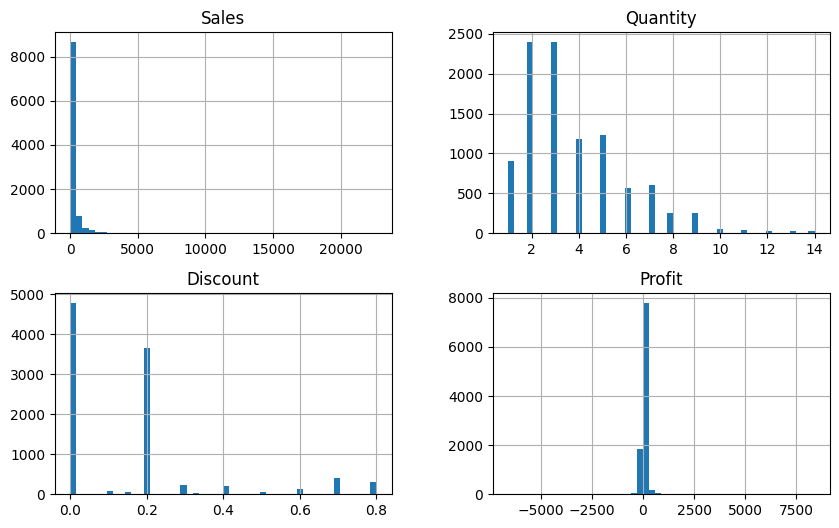

In [164]:
df.hist(figsize=(10,6),bins=50)
plt.show()

## Profit vs Discount

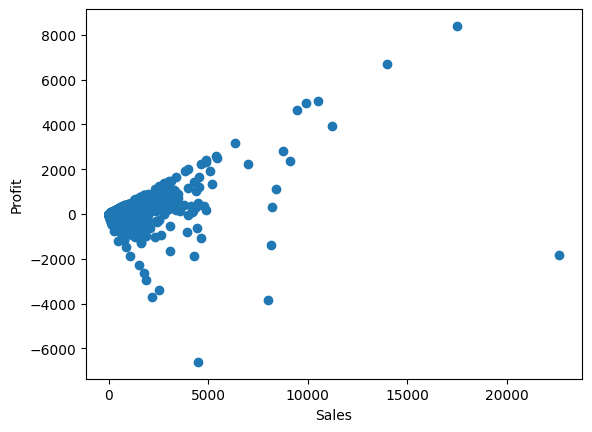

In [156]:
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

<Axes: xlabel='Discount', ylabel='Profit'>

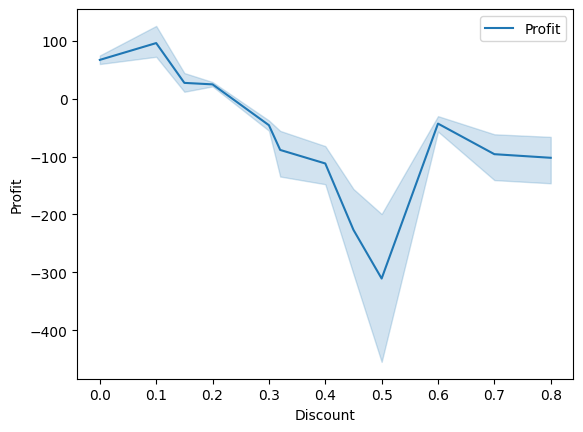

In [157]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)


## Region

<Axes: ylabel='Region'>

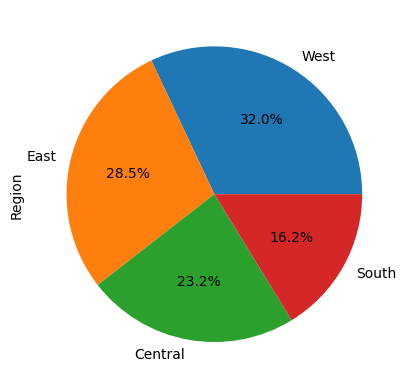

In [158]:
df['Region'].value_counts().plot.pie(autopct = '%.1f%%')

## Profit vs Quantity

<Axes: xlabel='Quantity', ylabel='Profit'>

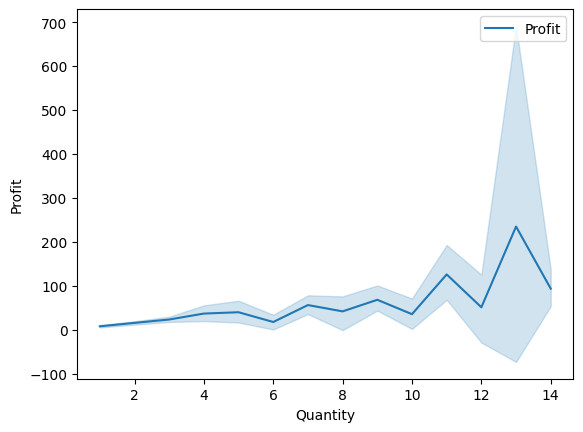

In [159]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)


## Segment Sales in each Region

Text(0.5, 0, 'Region')

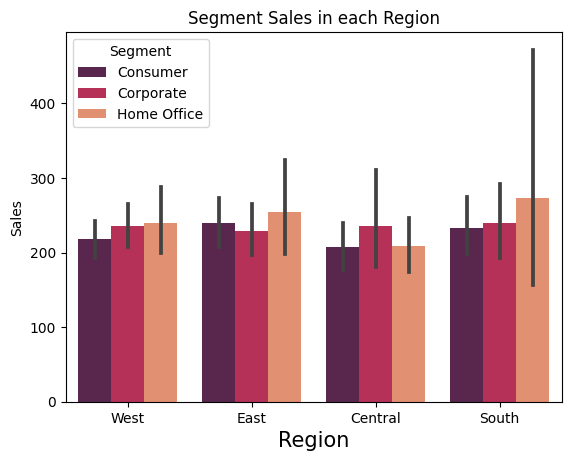

In [160]:
plt.title('Segment Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)

## Segment & Profit

<Axes: xlabel='Segment', ylabel='Profit'>

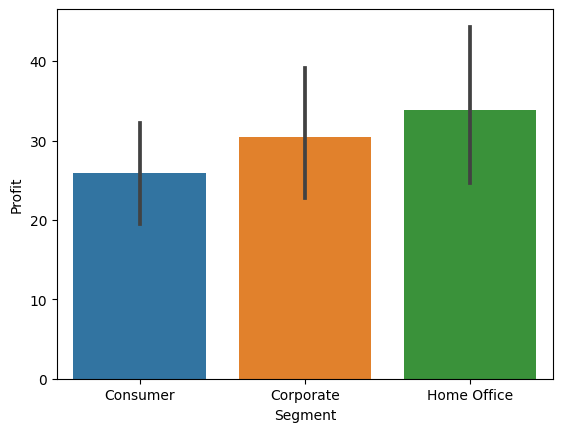

In [161]:
 sns.barplot(x='Segment', y='Profit',data=df)

## Segment & Discount

<Axes: xlabel='Segment', ylabel='Discount'>

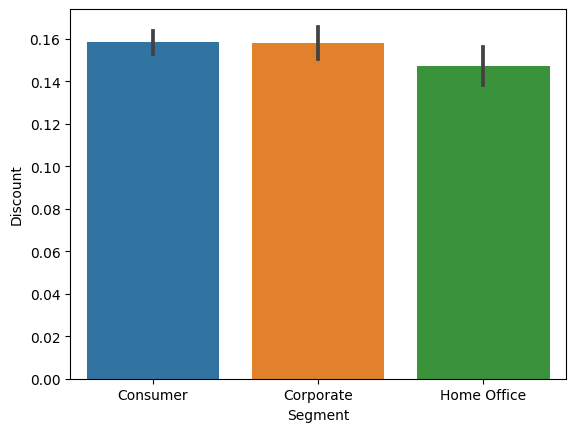

In [152]:
 sns.barplot(x='Segment', y='Discount',data=df)

***The most important points I noticed***

- From Segment Analysis Most Profitable Segment is Home Office
- The top profitable category is Technology & Office Supplies
- Washington, New York, and California are the top performing states
- The Home Office and Corporate segments are the most profitable segments

- Furniture categories have high sales but low profit margins

**Some suggestions for higher quality**
- Discounts should be minimized, especially for consumers and corporate segments

- Bookcase, tables, and supplies are not performing should be fix this feature









***Thanks ^^***